**# Atividade 2 - Análise de Dados com Spotify e Criação de Dashboard Interativo**

In [3]:
!pip install spotipy
import spotipy

from spotipy.oauth2 import SpotifyClientCredentials
import json
from bs4 import BeautifulSoup #!pip install beautifulsoup4
import requests
from spotipy.oauth2 import SpotifyClientCredentials
import json
from bs4 import BeautifulSoup #pip install beautifulsoup4
import requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.5/261.5 kB 7.0 MB/s eta 0:00:00


In [5]:
cred = json.load(open('auth.json'))
client_id = cred['client_id']
client_secret = cred['client_secret']

In [6]:
ccm = SpotifyClientCredentials(client_id=client_id,client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=ccm)

**1. Coleta de Dados com a API do Spotify**

In [9]:
import pandas as pd
import time
from spotipy.exceptions import SpotifyException

def coletar_dados_spotify(artistas):
    """
    Coleta dados básicos de artistas e suas músicas mais populares do Spotify

    Parameters:
    artistas (list): Lista com nomes dos artistas para busca

    Returns:
    pandas.DataFrame: DataFrame com os dados coletados
    """
    dados = []

    for artista_nome in artistas:
        try:
            # Busca o artista
            resultado = sp.search(q=artista_nome, type='artist', limit=1)

            if not resultado['artists']['items']:
                print(f"Artista não encontrado: {artista_nome}")
                continue

            artista = resultado['artists']['items'][0]

            # Coleta as top tracks do artista
            top_tracks = sp.artist_top_tracks(artista['id'])

            for track in top_tracks['tracks']:
                # Cria dicionário com os dados básicos
                track_data = {
                    'artista_nome': artista['name'],
                    'artista_id': artista['id'],
                    'artista_popularidade': artista['popularity'],
                    'artista_generos': ', '.join(artista['genres']),
                    'musica_nome': track['name'],
                    'musica_id': track['id'],
                    'musica_popularidade': track['popularity'],
                    'album_nome': track['album']['name'],
                    'album_id': track['album']['id'],
                    'data_lancamento': track['album']['release_date'],
                    'duracao_ms': track['duration_ms'],
                    'explicita': track['explicit'],
                    'preview_url': track['preview_url'],
                    'external_url': track['external_urls']['spotify']
                }

                dados.append(track_data)

            # Pausa para evitar atingir limite de requisições
            time.sleep(1)

        except Exception as e:
            print(f"Erro ao processar artista {artista_nome}: {str(e)}")
            continue

    if not dados:
        print("Nenhum dado foi coletado.")
        return None

    # Cria DataFrame
    df = pd.DataFrame(dados)
    return df

# Lista de artistas para exemplo (pode ser modificada)
artistas = [
    'Ed Sheeran',
    'Taylor Swift',
    'The Weeknd',
    'Ariana Grande',
    'Drake'
]

# Coleta os dados
df_spotify = coletar_dados_spotify(artistas)

if df_spotify is not None:
    # Salva em CSV
    df_spotify.to_csv('dados_spotify.csv', index=False, encoding='utf-8')
    print("Dados salvos com sucesso!")

    # Mostra as primeiras linhas e informações do DataFrame
    print("\nPrimeiras linhas do DataFrame:")
    print(df_spotify.head())
    print("\nInformações do DataFrame:")
    print(df_spotify.info())

Dados salvos com sucesso!

Primeiras linhas do DataFrame:
  artista_nome              artista_id  artista_popularidade  \
0   Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V                    90   
1   Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V                    90   
2   Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V                    90   
3   Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V                    90   
4   Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V                    90   

                      artista_generos      musica_nome  \
0  pop, singer-songwriter pop, uk pop  Merry Christmas   
1  pop, singer-songwriter pop, uk pop     Shape of You   
2  pop, singer-songwriter pop, uk pop          Perfect   
3  pop, singer-songwriter pop, uk pop       Photograph   
4  pop, singer-songwriter pop, uk pop          Shivers   

                musica_id  musica_popularidade           album_nome  \
0  3bH2Eu9A9ymI4UnGHRmoXg                   81      Merry Christmas   
1  7qiZfU4dY1lWllzX7mPBI3                   86           ÷ (Deluxe

**2. Análise Exploratória de Dados (EDA)**

<ipython-input-12-f034a8db1e14>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
<ipython-input-12-f034a8db1e14>:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')



Estatísticas descritivas por artista:
              musica_popularidade               duracao_minutos        \
                             mean   std min max            mean   std   
artista_nome                                                            
Ariana Grande                83.6  3.63  79  92            3.30  0.75   
Drake                        79.4  2.12  77  84            3.79  1.01   
Ed Sheeran                   76.7  7.57  64  86            4.01  0.42   
Taylor Swift                 81.5  4.84  69  88            3.74  0.38   
The Weeknd                   84.9  4.12  79  92            3.76  0.85   

              explicita  
                   mean  
artista_nome             
Ariana Grande       0.3  
Drake               0.9  
Ed Sheeran          0.0  
Taylor Swift        0.1  
The Weeknd          0.5  

Média de popularidade por artista:
artista_nome
The Weeknd       84.9
Ariana Grande    83.6
Taylor Swift     81.5
Drake            79.4
Ed Sheeran       76.7
Name: mus

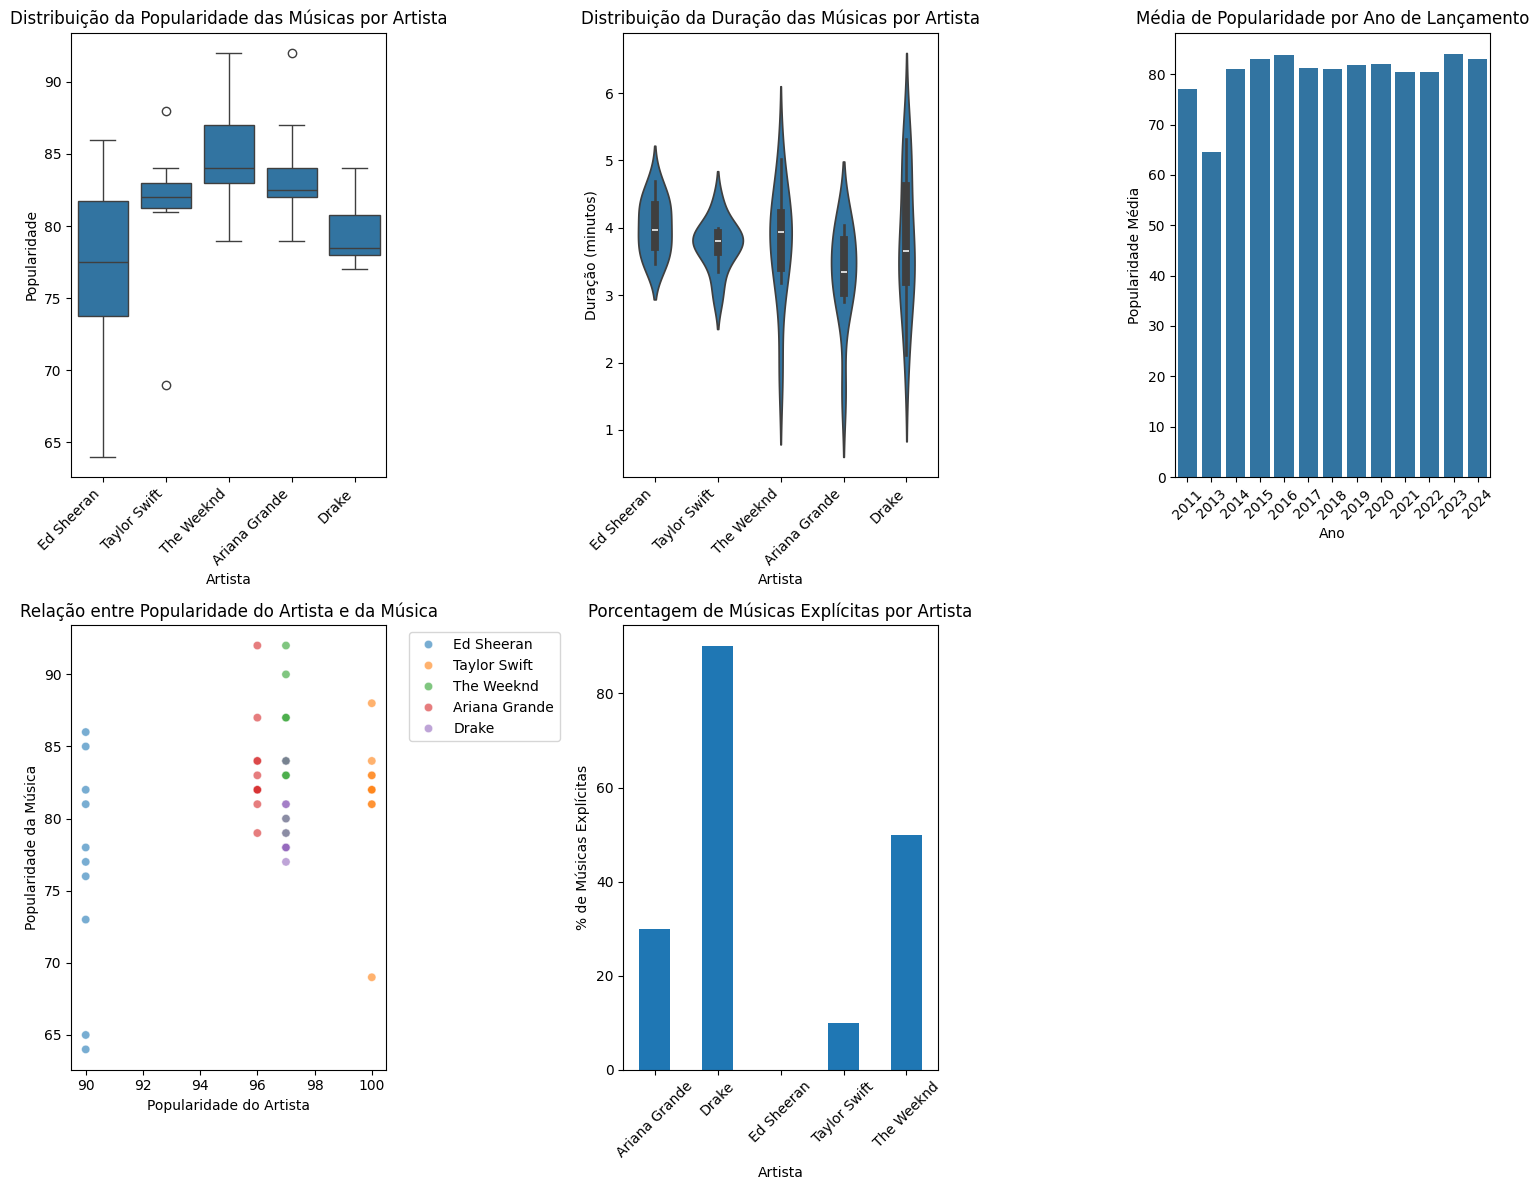

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Lê o arquivo CSV
df = pd.read_csv('dados_spotify.csv')

# Configurações básicas do matplotlib
plt.rcParams['figure.figsize'] = [15, 12]

# Preparação dos dados
# Função para extrair o ano da data
def extrair_ano(data):
    # Se a data é apenas um ano
    if len(str(data)) == 4:
        return int(data)
    # Se a data está em outro formato, tenta converter para datetime
    try:
        return pd.to_datetime(data).year
    except:
        return None

# Extrai o ano da data de lançamento
df['ano_lancamento'] = df['data_lancamento'].apply(extrair_ano)

# Converte duração de ms para minutos
df['duracao_minutos'] = df['duracao_ms'] / (1000 * 60)

# Cria subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 12))

# 1. Boxplot: Popularidade por Artista
sns.boxplot(data=df, x='artista_nome', y='musica_popularidade', ax=axes[0, 0])
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
axes[0, 0].set_title('Distribuição da Popularidade das Músicas por Artista')
axes[0, 0].set_xlabel('Artista')
axes[0, 0].set_ylabel('Popularidade')

# 2. Violin plot: Duração das músicas por artista
sns.violinplot(data=df, x='artista_nome', y='duracao_minutos', ax=axes[0, 1])
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
axes[0, 1].set_title('Distribuição da Duração das Músicas por Artista')
axes[0, 1].set_xlabel('Artista')
axes[0, 1].set_ylabel('Duração (minutos)')

# 3. Gráfico de barras: Média de popularidade por ano de lançamento
popularidade_por_ano = df.groupby('ano_lancamento')['musica_popularidade'].mean().reset_index()
sns.barplot(data=popularidade_por_ano, x='ano_lancamento', y='musica_popularidade', ax=axes[0, 2])
axes[0, 2].set_title('Média de Popularidade por Ano de Lançamento')
axes[0, 2].set_xlabel('Ano')
axes[0, 2].set_ylabel('Popularidade Média')
axes[0, 2].tick_params(axis='x', rotation=45)

# 4. Gráfico de dispersão: Relação entre popularidade do artista e música
sns.scatterplot(data=df, x='artista_popularidade', y='musica_popularidade',
                hue='artista_nome', alpha=0.6, ax=axes[1, 0])
axes[1, 0].set_title('Relação entre Popularidade do Artista e da Música')
axes[1, 0].set_xlabel('Popularidade do Artista')
axes[1, 0].set_ylabel('Popularidade da Música')
axes[1, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 5. Gráfico de barras: Proporção de músicas explícitas por artista
explicitas_por_artista = df.groupby('artista_nome')['explicita'].mean() * 100
explicitas_por_artista.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Porcentagem de Músicas Explícitas por Artista')
axes[1, 1].set_xlabel('Artista')
axes[1, 1].set_ylabel('% de Músicas Explícitas')
axes[1, 1].tick_params(axis='x', rotation=45)

# Remove o subplot vazio
axes[1, 2].remove()

# Ajusta o layout
plt.tight_layout()

# Salva os gráficos
plt.savefig('spotify_analysis.png', dpi=300, bbox_inches='tight')

# Análises estatísticas
print("\nEstatísticas descritivas por artista:")
stats = df.groupby('artista_nome').agg({
    'musica_popularidade': ['mean', 'std', 'min', 'max'],
    'duracao_minutos': ['mean', 'std'],
    'explicita': 'mean'
}).round(2)
print(stats)

# Análise de popularidade
print("\nMédia de popularidade por artista:")
pop_media = df.groupby('artista_nome')['musica_popularidade'].mean().sort_values(ascending=False)
print(pop_media)

# Análise temporal
print("\nDistribuição de músicas por ano:")
print(df['ano_lancamento'].value_counts().sort_index())

# Estatísticas gerais
print("\nEstatísticas gerais:")
print(f"Total de músicas analisadas: {len(df)}")
print(f"Média de popularidade geral: {df['musica_popularidade'].mean():.2f}")
print(f"Duração média das músicas: {df['duracao_minutos'].mean():.2f} minutos")
print(f"Percentual de músicas explícitas: {(df['explicita'].mean() * 100):.2f}%")

# Correlação
print("\nCorrelação entre popularidade do artista e da música:")
correlation = df[['artista_popularidade', 'musica_popularidade']].corr()
print(correlation)

**3. Definição de Perguntas**

1. Análise de Popularidade Artista vs Músicas:


<ipython-input-15-734c2c5f9135>:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (pop_media['artista_popularidade'][i],
<ipython-input-15-734c2c5f9135>:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pop_media['musica_popularidade'][i]),


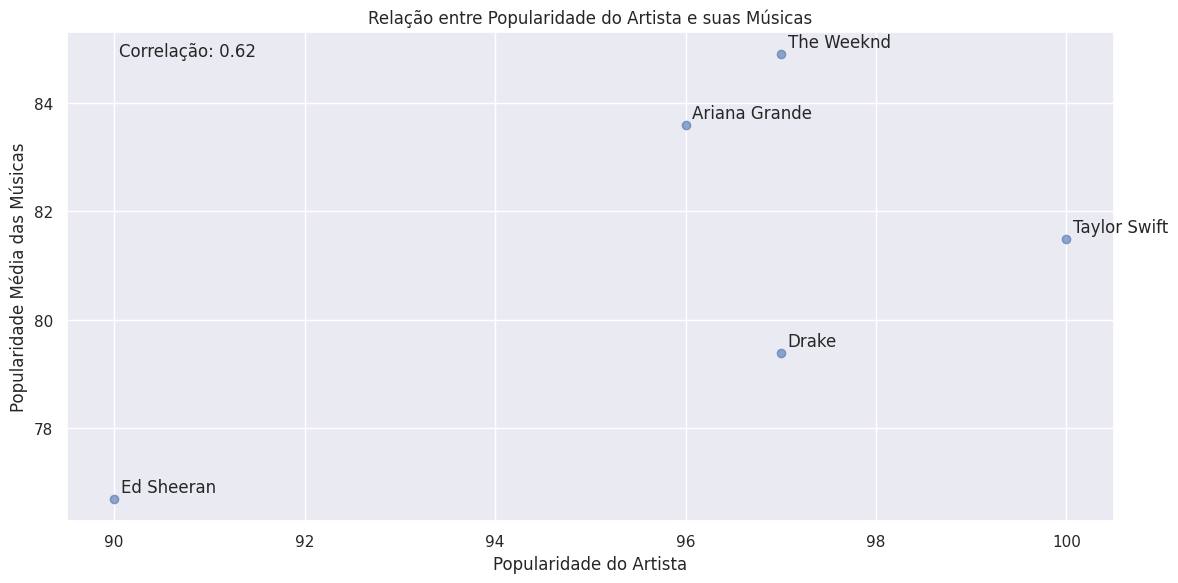


Estatísticas de popularidade por artista:
               musica_popularidade  artista_popularidade
artista_nome                                            
Ariana Grande                 83.6                    96
Drake                         79.4                    97
Ed Sheeran                    76.7                    90
Taylor Swift                  81.5                   100
The Weeknd                    84.9                    97

2. Análise Temporal dos Lançamentos:


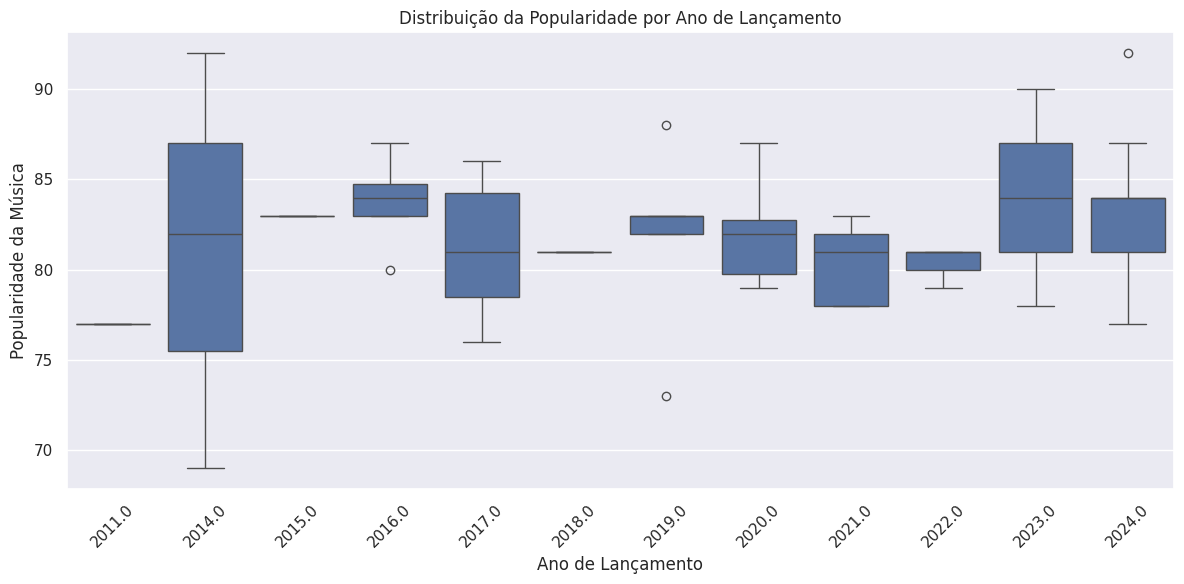


Estatísticas por ano de lançamento:
               musica_popularidade      
                              mean count
ano_lancamento                          
2011.0                       77.00     1
2014.0                       81.00     3
2015.0                       83.00     1
2016.0                       83.75     4
2017.0                       81.17     6
2018.0                       81.00     1
2019.0                       81.80     5
2020.0                       82.00     6
2021.0                       80.40     5
2022.0                       80.33     3
2023.0                       84.00     2
2024.0                       83.09    11

3. Análise de Duração e Popularidade:


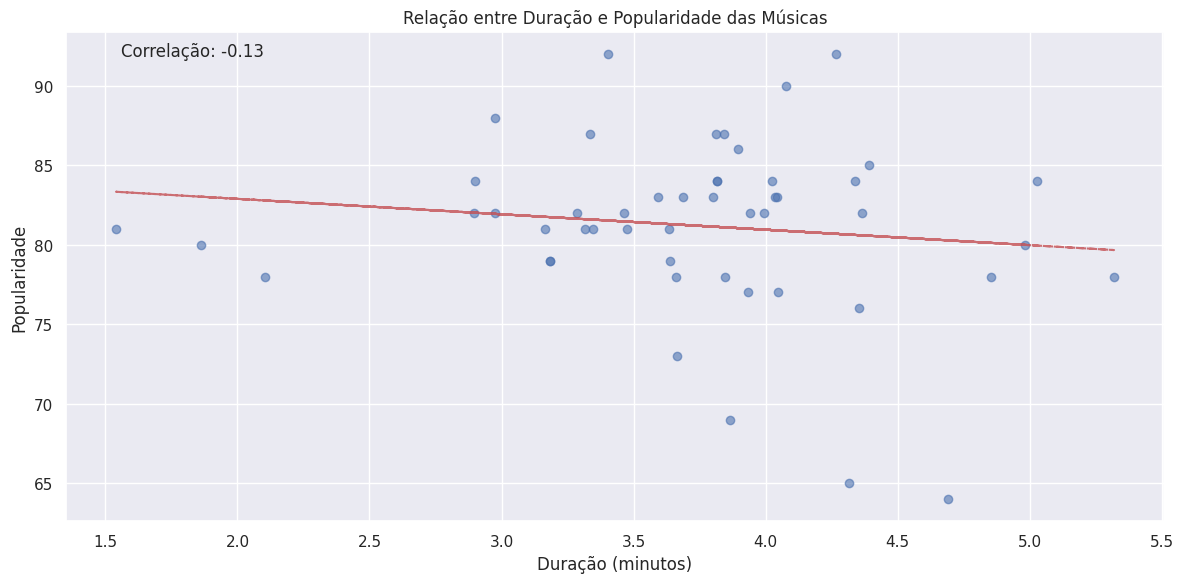


Estatísticas por gênero musical:
                          duracao_min       musica_popularidade      
                                 mean   std                mean count
artista_generos                                                      
canadian contemporary r&b        3.76  0.85               84.90    10
canadian hip hop                 3.79  1.01               79.40    10
canadian pop                     3.77  0.91               82.15    20
hip hop                          3.79  1.01               79.40    10
pop                              3.70  0.66               81.68    40
pop rap                          3.79  1.01               79.40    10
rap                              3.79  1.01               79.40    10
singer-songwriter pop            4.01  0.42               76.70    10
uk pop                           4.01  0.42               76.70    10


In [15]:
# Primeiro, vamos garantir que temos todas as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

# Configurações básicas para visualização
plt.style.use('default')
sns.set()

# Carregando os dados
df = pd.read_csv('dados_spotify.csv')

# 1. Análise da relação entre popularidade do artista e suas músicas
def analise_popularidade():
    # Calcula a popularidade média das músicas por artista
    pop_media = df.groupby('artista_nome').agg({
        'musica_popularidade': 'mean',
        'artista_popularidade': 'first'
    }).round(2)

    # Criando o gráfico de dispersão
    plt.figure(figsize=(12, 6))
    plt.scatter(pop_media['artista_popularidade'],
                pop_media['musica_popularidade'],
                alpha=0.6)

    # Adicionando rótulos para cada ponto
    for i, artista in enumerate(pop_media.index):
        plt.annotate(artista,
                    (pop_media['artista_popularidade'][i],
                     pop_media['musica_popularidade'][i]),
                    xytext=(5, 5), textcoords='offset points')

    plt.xlabel('Popularidade do Artista')
    plt.ylabel('Popularidade Média das Músicas')
    plt.title('Relação entre Popularidade do Artista e suas Músicas')

    # Calculando correlação
    corr = pop_media['artista_popularidade'].corr(pop_media['musica_popularidade'])
    plt.text(0.05, 0.95, f'Correlação: {corr:.2f}',
             transform=plt.gca().transAxes)

    plt.tight_layout()
    plt.show()

    return pop_media

# 2. Análise temporal dos lançamentos
def analise_temporal():
    # Convertendo a coluna de data
    df['data_lancamento'] = pd.to_datetime(df['data_lancamento'], errors='coerce') # Adding errors='coerce'
    df['ano_lancamento'] = df['data_lancamento'].dt.year

    # Criando gráfico de popularidade por ano
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='ano_lancamento', y='musica_popularidade')
    plt.xticks(rotation=45)
    plt.xlabel('Ano de Lançamento')
    plt.ylabel('Popularidade da Música')
    plt.title('Distribuição da Popularidade por Ano de Lançamento')
    plt.tight_layout()
    plt.show()

    # Análise estatística por ano
    stats_temporal = df.groupby('ano_lancamento').agg({
        'musica_popularidade': ['mean', 'count']
    }).round(2)

    return stats_temporal

# 3. Análise da duração das músicas
def analise_duracao():
    # Convertendo duração para minutos
    df['duracao_min'] = df['duracao_ms'] / (1000 * 60)

    # Criando gráfico de dispersão
    plt.figure(figsize=(12, 6))
    plt.scatter(df['duracao_min'], df['musica_popularidade'], alpha=0.6)
    plt.xlabel('Duração (minutos)')
    plt.ylabel('Popularidade')
    plt.title('Relação entre Duração e Popularidade das Músicas')

    # Adicionando linha de tendência
    z = np.polyfit(df['duracao_min'], df['musica_popularidade'], 1)
    p = np.poly1d(z)
    plt.plot(df['duracao_min'], p(df['duracao_min']), "r--", alpha=0.8)

    # Calculando correlação
    corr = df['duracao_min'].corr(df['musica_popularidade'])
    plt.text(0.05, 0.95, f'Correlação: {corr:.2f}',
             transform=plt.gca().transAxes)

    plt.tight_layout()
    plt.show()

    # Estatísticas por gênero
    # Primeiro, explodindo a coluna de gêneros
    df_generos = df.copy()
    df_generos['artista_generos'] = df_generos['artista_generos'].str.split(', ')
    df_generos = df_generos.explode('artista_generos')

    # Calculando estatísticas por gênero
    stats_genero = df_generos.groupby('artista_generos').agg({
        'duracao_min': ['mean', 'std'],
        'musica_popularidade': ['mean', 'count']
    }).round(2)

    return stats_genero

# Executando todas as análises
print("1. Análise de Popularidade Artista vs Músicas:")
pop_media = analise_popularidade()
print("\nEstatísticas de popularidade por artista:")
print(pop_media)

print("\n2. Análise Temporal dos Lançamentos:")
stats_temporal = analise_temporal()
print("\nEstatísticas por ano de lançamento:")
print(stats_temporal)

print("\n3. Análise de Duração e Popularidade:")
stats_genero = analise_duracao()
print("\nEstatísticas por gênero musical:")
print(stats_genero)

**4. Definição de Métricas**

In [17]:
import pandas as pd
import numpy as np
from scipy import stats

def calcular_metricas_popularidade(df):
    """Calcula métricas relacionadas à popularidade artista-música"""

    # Agrupando por artista
    metricas_por_artista = df.groupby('artista_nome').agg({
        'musica_popularidade': ['mean', 'std', 'max'],
        'artista_popularidade': 'first'
    }).round(2)

    # Renomeando colunas para clareza
    metricas_por_artista.columns = ['pop_media_musicas', 'pop_std_musicas',
                                   'pop_max_musica', 'pop_artista']

    # Calculando métricas adicionais
    metricas_por_artista['ratio_pop'] = (metricas_por_artista['pop_media_musicas'] /
                                        metricas_por_artista['pop_artista']).round(2)
    metricas_por_artista['diff_max_artista'] = (metricas_por_artista['pop_max_musica'] -
                                               metricas_por_artista['pop_artista']).round(2)

    # Calculando correlação geral
    corr_pop = df['artista_popularidade'].corr(df['musica_popularidade'])

    return metricas_por_artista, corr_pop

def calcular_metricas_temporais(df):
    """Calcula métricas relacionadas ao padrão temporal"""

    # Convertendo data de lançamento
    df['data_lancamento'] = pd.to_datetime(df['data_lancamento'])
    df['ano_lancamento'] = df['data_lancamento'].dt.year

    # Calculando métricas por ano
    metricas_temporais = df.groupby('ano_lancamento').agg({
        'musica_popularidade': ['mean', 'median', 'count']
    }).round(2)

    # Calculando idade das músicas
    atual = df['ano_lancamento'].max()
    df['idade_musica'] = atual - df['ano_lancamento']

    # Calculando percentual de músicas antigas ainda populares
    musicas_antigas = df[df['idade_musica'] > 5]

    # Check if musicas_antigas is empty before calculating the percentage
    if len(musicas_antigas) == 0:
        perc_antigas_populares = 0  # or np.nan if you prefer to represent it as NaN
    else:
        perc_antigas_populares = (len(musicas_antigas[musicas_antigas['musica_popularidade'] > 80]) /
                                 len(musicas_antigas) * 100)

    # Rounding the percentage only if it's not zero or NaN
    if perc_antigas_populares != 0 and not np.isnan(perc_antigas_populares):
        perc_antigas_populares = round(perc_antigas_populares, 2)

    return metricas_temporais, perc_antigas_populares

def calcular_metricas_duracao(df):
    """Calcula métricas relacionadas à duração das músicas"""

    # Convertendo duração para minutos
    df['duracao_min'] = df['duracao_ms'] / (1000 * 60)

    # Calculando correlação entre duração e popularidade
    corr_duracao = df['duracao_min'].corr(df['musica_popularidade'])

    # Calculando métricas por gênero
    df_generos = df.copy()
    df_generos['artista_generos'] = df_generos['artista_generos'].str.split(', ')
    df_generos = df_generos.explode('artista_generos')

    metricas_genero = df_generos.groupby('artista_generos').agg({
        'duracao_min': ['mean', 'std'],
        'musica_popularidade': 'mean'
    }).round(2)

    # Calculando distribuição de durações para top/bottom músicas
    limite_top = df['musica_popularidade'].quantile(0.75)
    top_duracoes = df[df['musica_popularidade'] >= limite_top]['duracao_min'].describe()
    bottom_duracoes = df[df['musica_popularidade'] < limite_top]['duracao_min'].describe()

    return metricas_genero, corr_duracao, top_duracoes, bottom_duracoes

# Calculando todas as métricas
metricas_pop, corr_pop = calcular_metricas_popularidade(df)
metricas_temp, perc_antigas = calcular_metricas_temporais(df)
metricas_dur, corr_dur, top_dur, bottom_dur = calcular_metricas_duracao(df)

# Exibindo resultados
print("1. Métricas de Popularidade Artista-Música:")
print(metricas_pop)
print(f"\nCorrelação geral entre popularidade de artista e música: {corr_pop:.2f}")

print("\n2. Métricas Temporais:")
print(metricas_temp)
print(f"\nPercentual de músicas antigas (>5 anos) ainda populares: {perc_antigas}%")

print("\n3. Métricas de Duração:")
print("\nEstatísticas por gênero:")
print(metricas_dur)
print(f"\nCorrelação entre duração e popularidade: {corr_dur:.2f}")
print("\nDistribuição de durações das músicas mais populares (top 25%):")
print(top_dur)
print("\nDistribuição de durações das demais músicas:")
print(bottom_dur)

1. Métricas de Popularidade Artista-Música:
               pop_media_musicas  pop_std_musicas  pop_max_musica  \
artista_nome                                                        
Ariana Grande               83.6             3.63              92   
Drake                       79.4             2.12              84   
Ed Sheeran                  76.7             7.57              86   
Taylor Swift                81.5             4.84              88   
The Weeknd                  84.9             4.12              92   

               pop_artista  ratio_pop  diff_max_artista  
artista_nome                                             
Ariana Grande           96       0.87                -4  
Drake                   97       0.82               -13  
Ed Sheeran              90       0.85                -4  
Taylor Swift           100       0.82               -12  
The Weeknd              97       0.88                -5  

Correlação geral entre popularidade de artista e música: 0.34

2.

**5. Escolha de Gráficos**

1. Visualizações da Relação de Popularidade:


<ipython-input-18-655e3eef6182>:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (pop_media['artista_popularidade'][i],
<ipython-input-18-655e3eef6182>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pop_media['musica_popularidade'][i]),


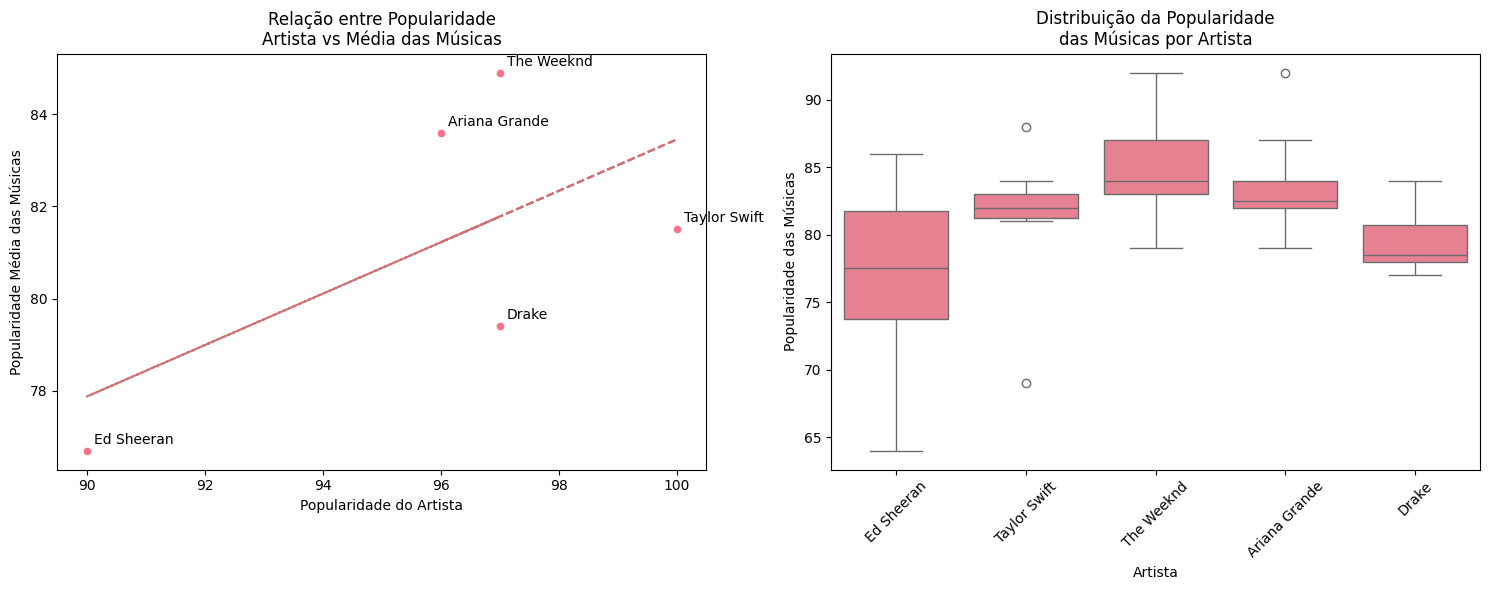


2. Visualizações da Análise Temporal:


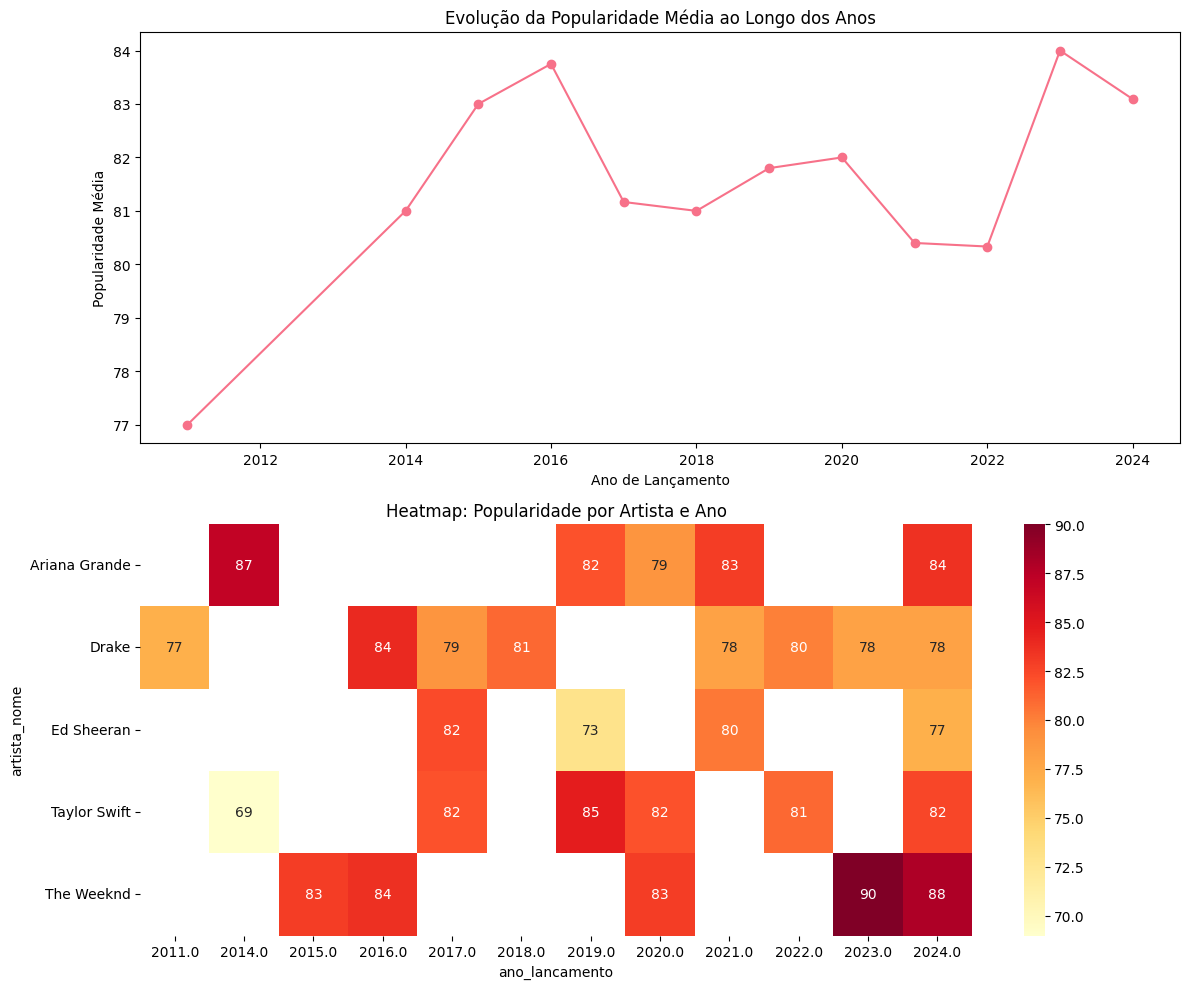


3. Visualizações da Análise de Duração:


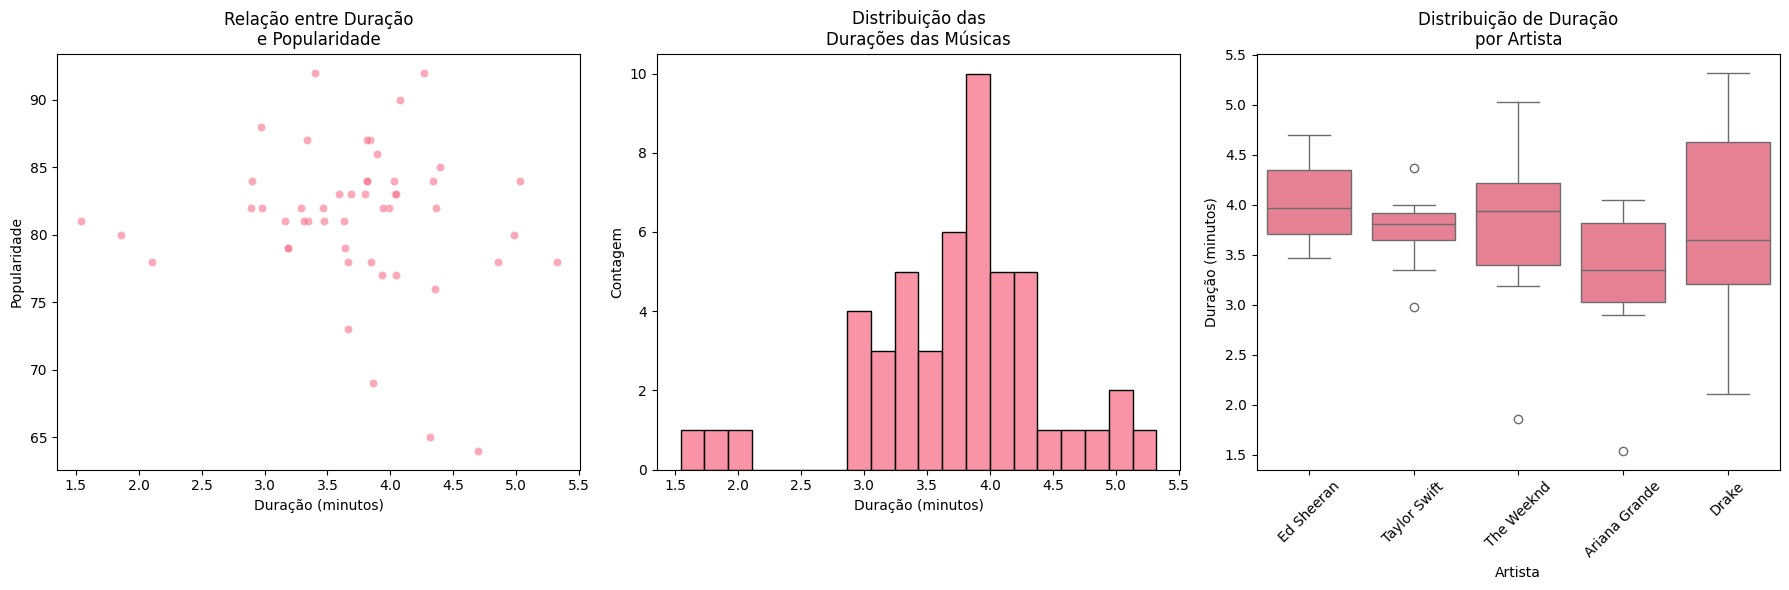

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurações gerais dos gráficos
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 6]

def plot_popularidade_relacao():
    """Gráficos para análise da relação de popularidade artista-música"""
    # Preparando dados
    pop_media = df.groupby('artista_nome').agg({
        'musica_popularidade': 'mean',
        'artista_popularidade': 'first'
    }).round(2)

    # Criando figura com dois subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Scatter plot
    sns.scatterplot(data=pop_media,
                   x='artista_popularidade',
                   y='musica_popularidade',
                   ax=ax1)

    # Adicionando linha de tendência
    z = np.polyfit(pop_media['artista_popularidade'],
                  pop_media['musica_popularidade'], 1)
    p = np.poly1d(z)
    ax1.plot(pop_media['artista_popularidade'],
             p(pop_media['artista_popularidade']),
             "r--", alpha=0.8)

    # Adicionando rótulos para cada ponto
    for i, artista in enumerate(pop_media.index):
        ax1.annotate(artista,
                    (pop_media['artista_popularidade'][i],
                     pop_media['musica_popularidade'][i]),
                    xytext=(5, 5),
                    textcoords='offset points')

    ax1.set_title('Relação entre Popularidade\nArtista vs Média das Músicas')
    ax1.set_xlabel('Popularidade do Artista')
    ax1.set_ylabel('Popularidade Média das Músicas')

    # Box plot
    sns.boxplot(data=df, x='artista_nome', y='musica_popularidade', ax=ax2)
    ax2.set_title('Distribuição da Popularidade\ndas Músicas por Artista')
    ax2.set_xlabel('Artista')
    ax2.set_ylabel('Popularidade das Músicas')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

def plot_analise_temporal():
    """Gráficos para análise temporal"""
    # Convertendo data
    df['data_lancamento'] = pd.to_datetime(df['data_lancamento'])
    df['ano_lancamento'] = df['data_lancamento'].dt.year

    # Criando figura com dois subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

    # Line plot com média móvel
    temporal_media = df.groupby('ano_lancamento')['musica_popularidade'].mean()
    temporal_media.plot(kind='line', marker='o', ax=ax1)
    ax1.set_title('Evolução da Popularidade Média ao Longo dos Anos')
    ax1.set_xlabel('Ano de Lançamento')
    ax1.set_ylabel('Popularidade Média')

    # Heatmap de popularidade por ano e artista
    pivot_temporal = df.pivot_table(
        values='musica_popularidade',
        index='artista_nome',
        columns='ano_lancamento',
        aggfunc='mean'
    )

    sns.heatmap(pivot_temporal,
                cmap='YlOrRd',
                annot=True,
                fmt='.0f',
                ax=ax2)
    ax2.set_title('Heatmap: Popularidade por Artista e Ano')
    plt.tight_layout()
    plt.show()

def plot_analise_duracao():
    """Gráficos para análise da duração das músicas"""
    # Convertendo duração para minutos
    df['duracao_min'] = df['duracao_ms'] / (1000 * 60)

    # Criando figura com três subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    # Scatter plot: Duração vs Popularidade
    sns.scatterplot(data=df,
                   x='duracao_min',
                   y='musica_popularidade',
                   alpha=0.6,
                   ax=ax1)
    ax1.set_title('Relação entre Duração\ne Popularidade')
    ax1.set_xlabel('Duração (minutos)')
    ax1.set_ylabel('Popularidade')

    # Histograma das durações
    sns.histplot(data=df,
                x='duracao_min',
                bins=20,
                ax=ax2)
    ax2.set_title('Distribuição das\nDurações das Músicas')
    ax2.set_xlabel('Duração (minutos)')
    ax2.set_ylabel('Contagem')

    # Box plot de duração por artista
    sns.boxplot(data=df,
                x='artista_nome',
                y='duracao_min',
                ax=ax3)
    ax3.set_title('Distribuição de Duração\npor Artista')
    ax3.set_xlabel('Artista')
    ax3.set_ylabel('Duração (minutos)')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# Executando todas as visualizações
print("1. Visualizações da Relação de Popularidade:")
plot_popularidade_relacao()

print("\n2. Visualizações da Análise Temporal:")
plot_analise_temporal()

print("\n3. Visualizações da Análise de Duração:")
plot_analise_duracao()